Extracción de Características --- Análisis de Factores
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]()

In [1]:
!pip3 install --quiet factor_analyzer

     |████████████████████████████████| 40 kB 2.7 MB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=a6b231f35bd54d775466b07866dea4af7244245e97310beaf4a111fca45c7691
  Stored in directory: /root/.cache/pip/wheels/eb/fa/90/032dca854f9faf31265c49d06c3f6eae3ede56cca623f8a27e
Successfully built factor-analyzer


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


In [7]:
tips = sns.load_dataset('tips')

columns = ['total_bill', 'tip', 'size']
df = tips[columns]
x = df.values


## Sklearn

In [8]:
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=3, random_state=42).fit(x)

pd.DataFrame(factor.components_, columns=columns)

,total_bill,tip,size
0,8.827560,0.940874,0.572776
1,-0.054868,0.301503,0.195224
2,-0.000000,0.000000,-0.000000


## FactorAnalyzer

In [9]:
chi2_value, p_value = calculate_bartlett_sphericity(df)
display(chi2_value, p_value)

261.985109009744

8.331146616424265e-57

In [10]:
kmo, kmo_model = calculate_kmo(df)
kmo_model

0.6788963894769224

In [13]:
#
# Numero de factores
#
fa = FactorAnalyzer()
fa.fit(df, 2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [14]:
ev, vector = fa.get_eigenvalues()
ev

array([2.17882968, 0.5191269 , 0.30204342])

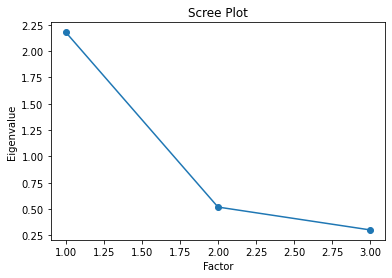

In [15]:
max_factors = df.shape[1] + 1

plt.scatter(range(1, max_factors), ev)
plt.plot(range(1, max_factors), ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

In [16]:
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'loadings'

In [17]:
fa.get_factor_variance()

(array([0.69115316, 0.526263  , 0.05298327]),
 array([0.23038439, 0.175421  , 0.01766109]),
 array([0.23038439, 0.40580539, 0.42346647]))